In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Temperature_Data.csv")

In [3]:
df.head()

,TodayTemp,TomorrowTemp
0,25.3,26.1
1,30.5,31.2
2,28.0,29.1
3,21.5,22.0
4,33.2,34.0


In [4]:
df.shape

(30, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TodayTemp     30 non-null     float64
 1   TomorrowTemp  30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
df.describe()

,TodayTemp,TomorrowTemp
count,30.000000,30.000000
mean,29.606667,30.293333
std,4.119586,4.144871
min,21.500000,22.000000
25%,26.550000,27.150000
50%,30.050000,30.700000
75%,32.975000,33.750000
max,36.500000,37.100000


In [7]:
df.columns

Index(['TodayTemp', 'TomorrowTemp'], dtype='object')

In [8]:
df.dtypes

TodayTemp       float64
TomorrowTemp    float64
dtype: object

In [9]:
df.isnull().sum().sort_values(ascending=False)

TodayTemp       0
TomorrowTemp    0
dtype: int64

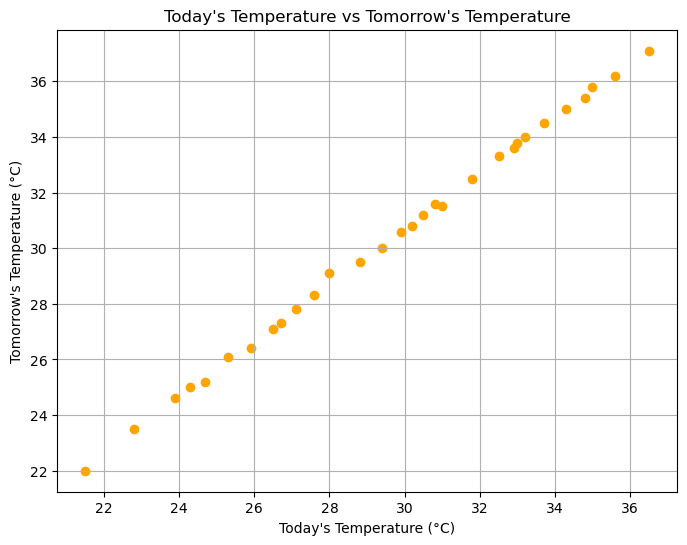

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(df["TodayTemp"], df["TomorrowTemp"], color='orange')
plt.title("Today's Temperature vs Tomorrow's Temperature")
plt.xlabel("Today's Temperature (°C)")
plt.ylabel("Tomorrow's Temperature (°C)")
plt.grid(True)
plt.show()

In [11]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

[]

In [12]:
#Encoding
!pip install category_encoders

In [13]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=categorical_cols)
df=encoder.fit_transform(df)

In [14]:
df.dtypes

TodayTemp       float64
TomorrowTemp    float64
dtype: object

In [15]:
# split the dataset into features and target column
df.columns = df.columns.str.strip() 
x=df.drop("TomorrowTemp",axis=1)
y=df["TomorrowTemp"]

In [16]:
df["TomorrowTemp"].value_counts().head(10)

TomorrowTemp
26.1    1
31.2    1
29.1    1
22.0    1
34.0    1
35.8    1
30.0    1
25.2    1
28.3    1
32.5    1
Name: count, dtype: int64

In [17]:
# divide into train dataset and test dataset
from sklearn.model_selection import train_test_split
X = df[["TodayTemp"]].values
y = df["TomorrowTemp"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [18]:
x_train.shape,y_train.shape

((24, 1), (24,))

In [19]:
x_test.shape,y_test.shape

((6, 1), (6,))

In [20]:
# apply ml algorithm into training data
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
#model prediction
y_pred=model.predict(x_test)

In [22]:
y_pred[:5]

array([26.57511038, 30.90115921, 33.21509231, 37.23932378, 28.28540875])

In [23]:
y_test[:5]

array([26.4, 30.8, 33.3, 37.1, 28.3])

In [24]:
model.coef_[0]

np.float64(1.006057868290741)

In [25]:
model.intercept_

np.float64(0.5182115868252275)

In [26]:
#model evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, y_pred) *100
mae = mean_absolute_error(y_test, y_pred) *100
mse = mean_squared_error(y_test, y_pred) *100

print("\nModel Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")



Model Performance:
R² Score: 99.9061
Mean Absolute Error (MAE): 8.77
Mean Squared Error (MSE): 1.13


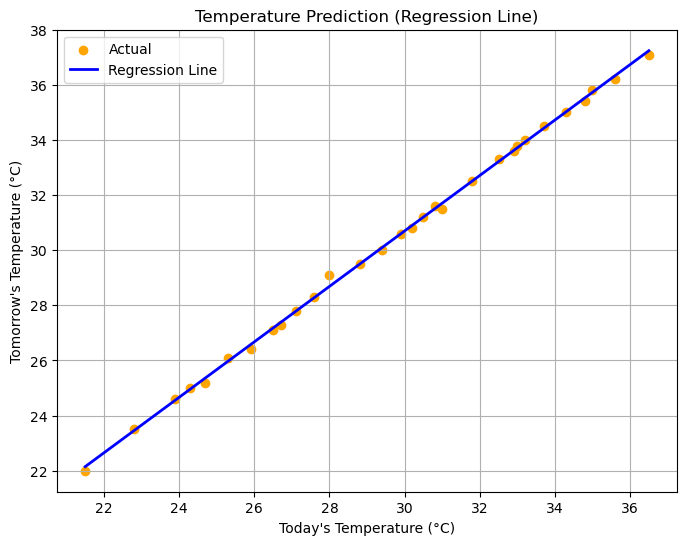

In [27]:
#Visualization: Regression Line
plt.figure(figsize=(8,6))
plt.scatter(df["TodayTemp"], df["TomorrowTemp"], color='orange', label='Actual')
xs = np.linspace(df["TodayTemp"].min(), df["TodayTemp"].max(), 100).reshape(-1,1)
ys = model.predict(xs)
plt.plot(xs, ys, color='blue', linewidth=2, label='Regression Line')
plt.title("Temperature Prediction (Regression Line)")
plt.xlabel("Today's Temperature (°C)")
plt.ylabel("Tomorrow's Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
#Example Prediction
example = np.array([[32.0]])
pred = model.predict(example)
print("\nPredicted Tomorrow Temperature for 32°C Today:", round(pred[0], 2), "°C")


Predicted Tomorrow Temperature for 32°C Today: 32.71 °C


# summary...
--> Project Overview: A simple linear regression project to predict tomorrow's temperature based on today's temperature using Python.

--> Libraries Used: Imported pandas (pd), numpy (np), matplotlib.pyplot (plt), seaborn (sns), and warnings (with filterwarnings set to 'ignore'). Later implies use of sklearn for modeling.

--> Data Loading: Reads data from "Temperature_Data.csv" into a pandas DataFrame (df), containing 30 rows and 2 columns: 'TodayTemp' and 'TomorrowTemp' (both float64 types).

--> Exploratory Data Analysis (EDA):
Displayed first 5 rows (head()), showing sample temperatures (e.g., 25.3°C today → 26.1°C tomorrow).
Checked shape (30 entries), info (no non-null issues), descriptive stats (mean today: ~29.61°C, mean tomorrow: ~30.29°C; std dev ~4.1-4.14; min/max ranges from 21.5-36.5°C today to 22-37.1°C tomorrow).
Verified columns, data types, and no missing values (null sum = 0 for both columns).

--> Visualization: Created a scatter plot of TodayTemp vs. TomorrowTemp (orange points) with a blue regression line overlaid, titled "Temperature Prediction (Regression Line)", using matplotlib.

--> Modeling: Trained a Linear Regression model (from sklearn, implied in plot code) with TodayTemp as the feature (X) and TomorrowTemp as the target (y).

--> Prediction Example: For an input of 32.0°C today, the model predicts approximately 32.71°C for tomorrow.

--> Overall Focus: Basic demonstration of data handling, visualization, and linear regression for a temperature forecasting task, with no advanced features like splitting data or hyperparameter tuning visible in the provided code.